In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
import numpy as np
import heartpy as hp

sns.set(style="ticks", context="talk", rc={'figure.figsize':(20,10), 'figure.dpi':300})
plt.style.use("dark_background")

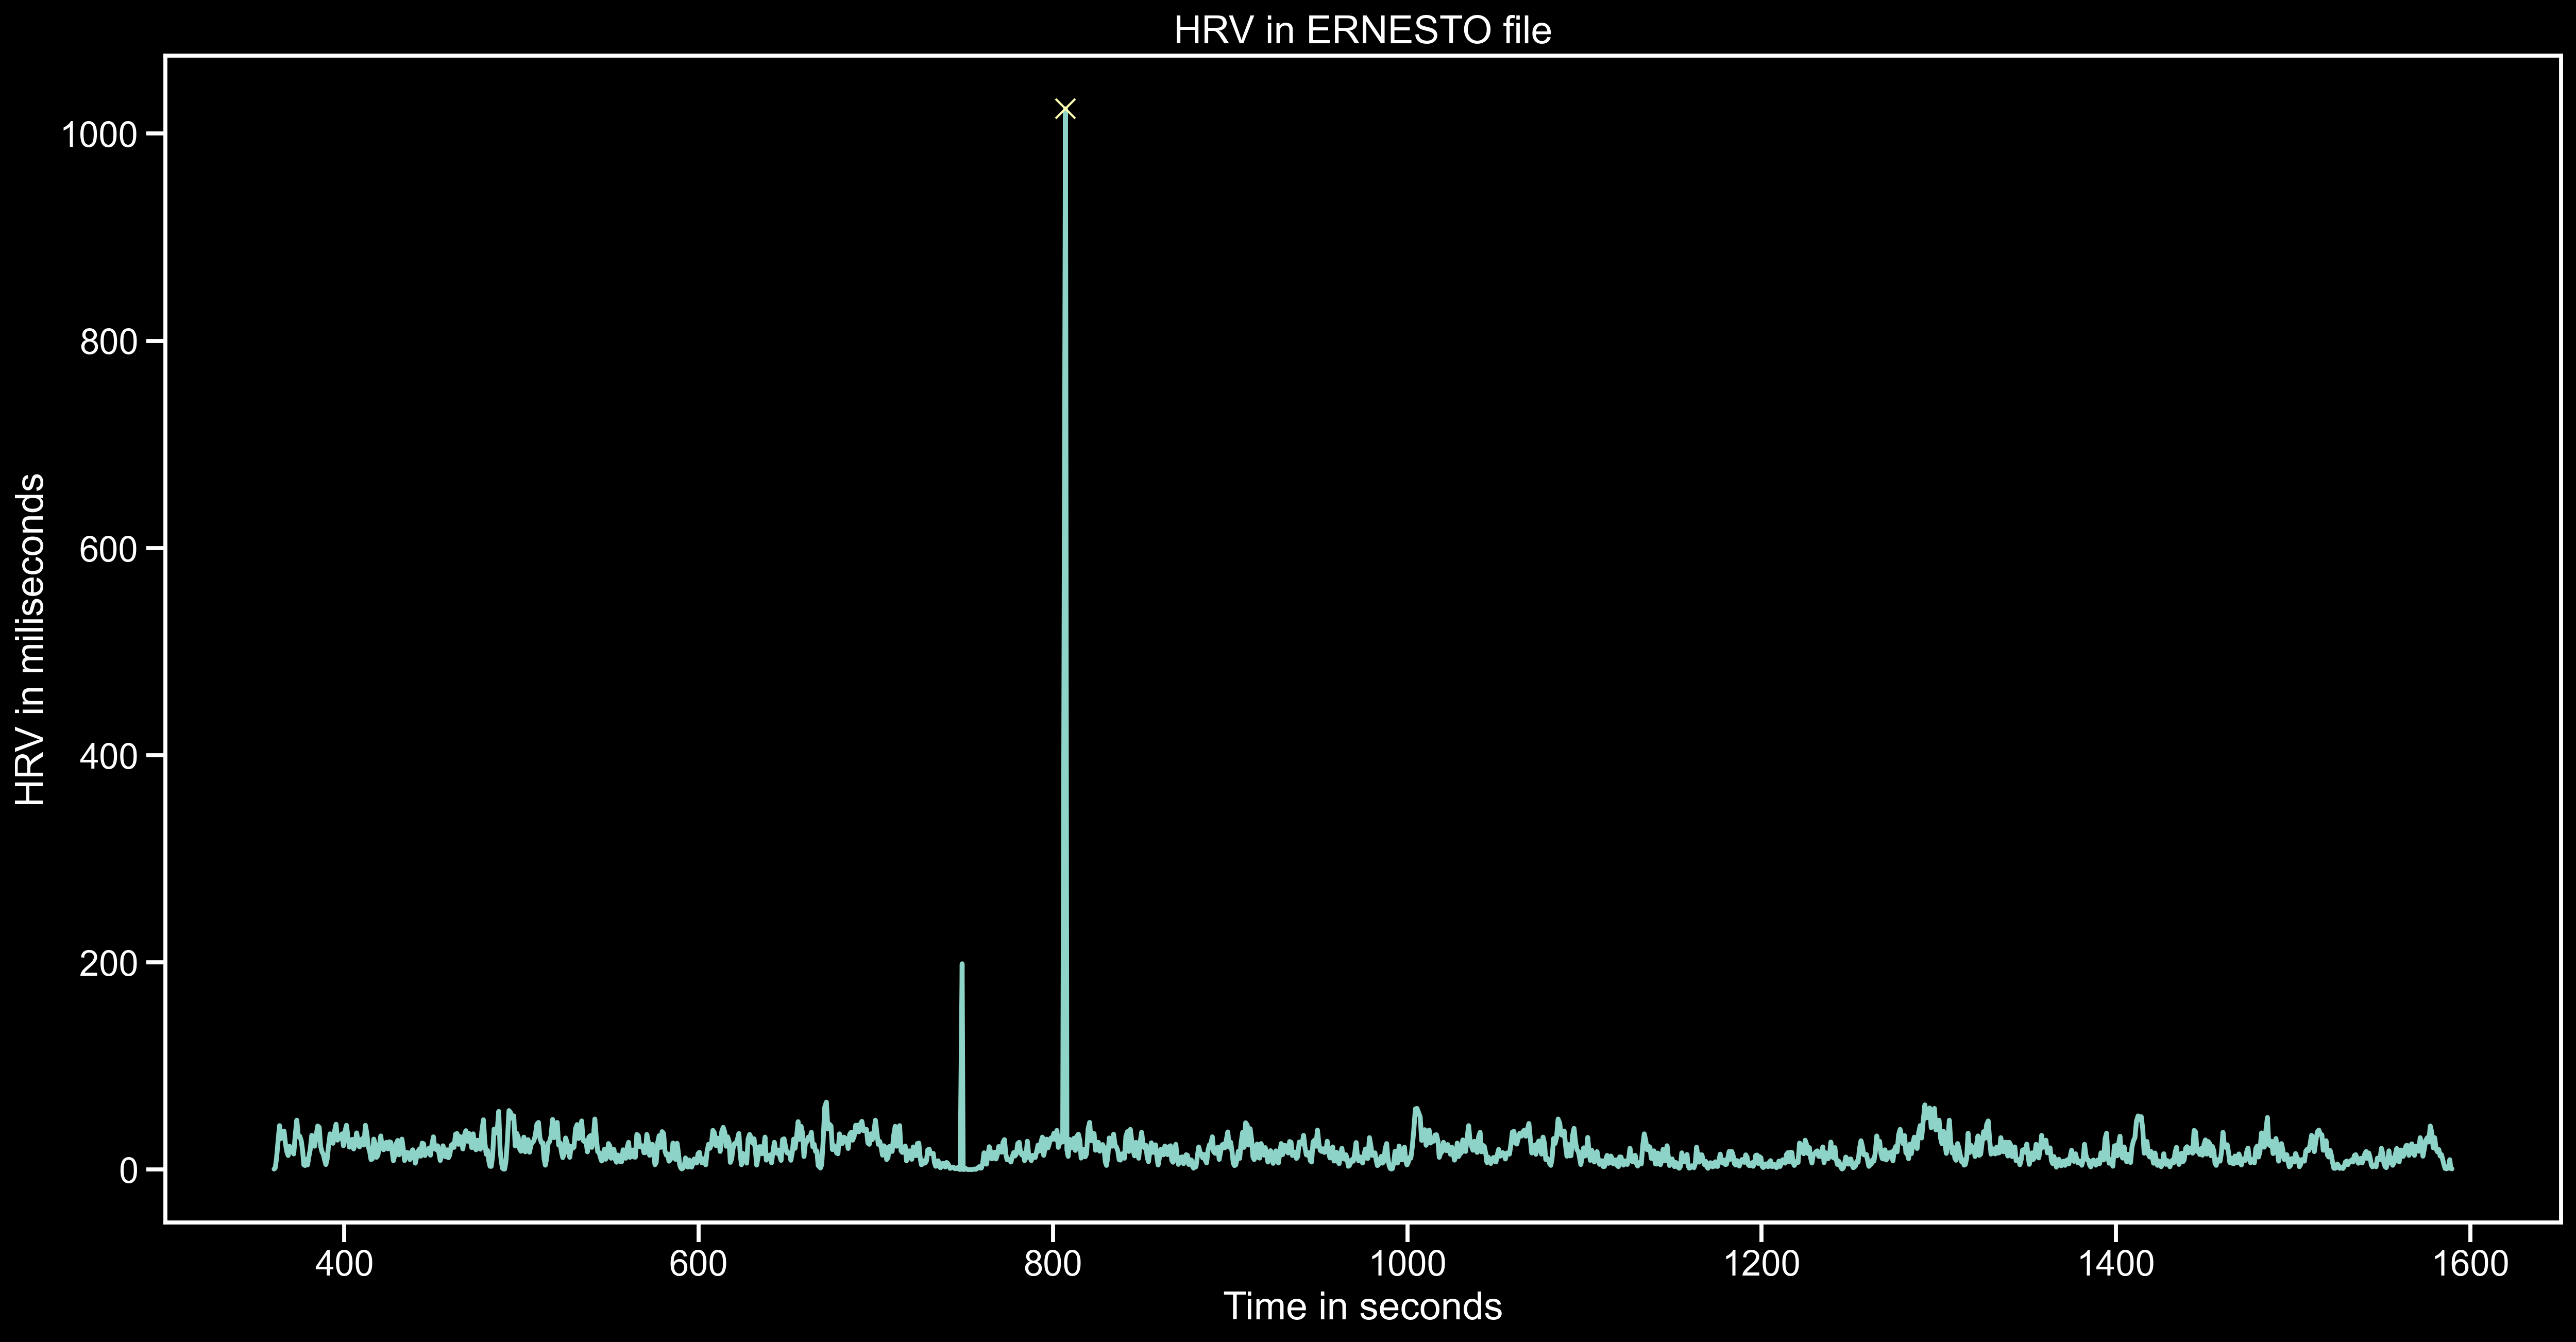

High variability in 13.45135 minutes


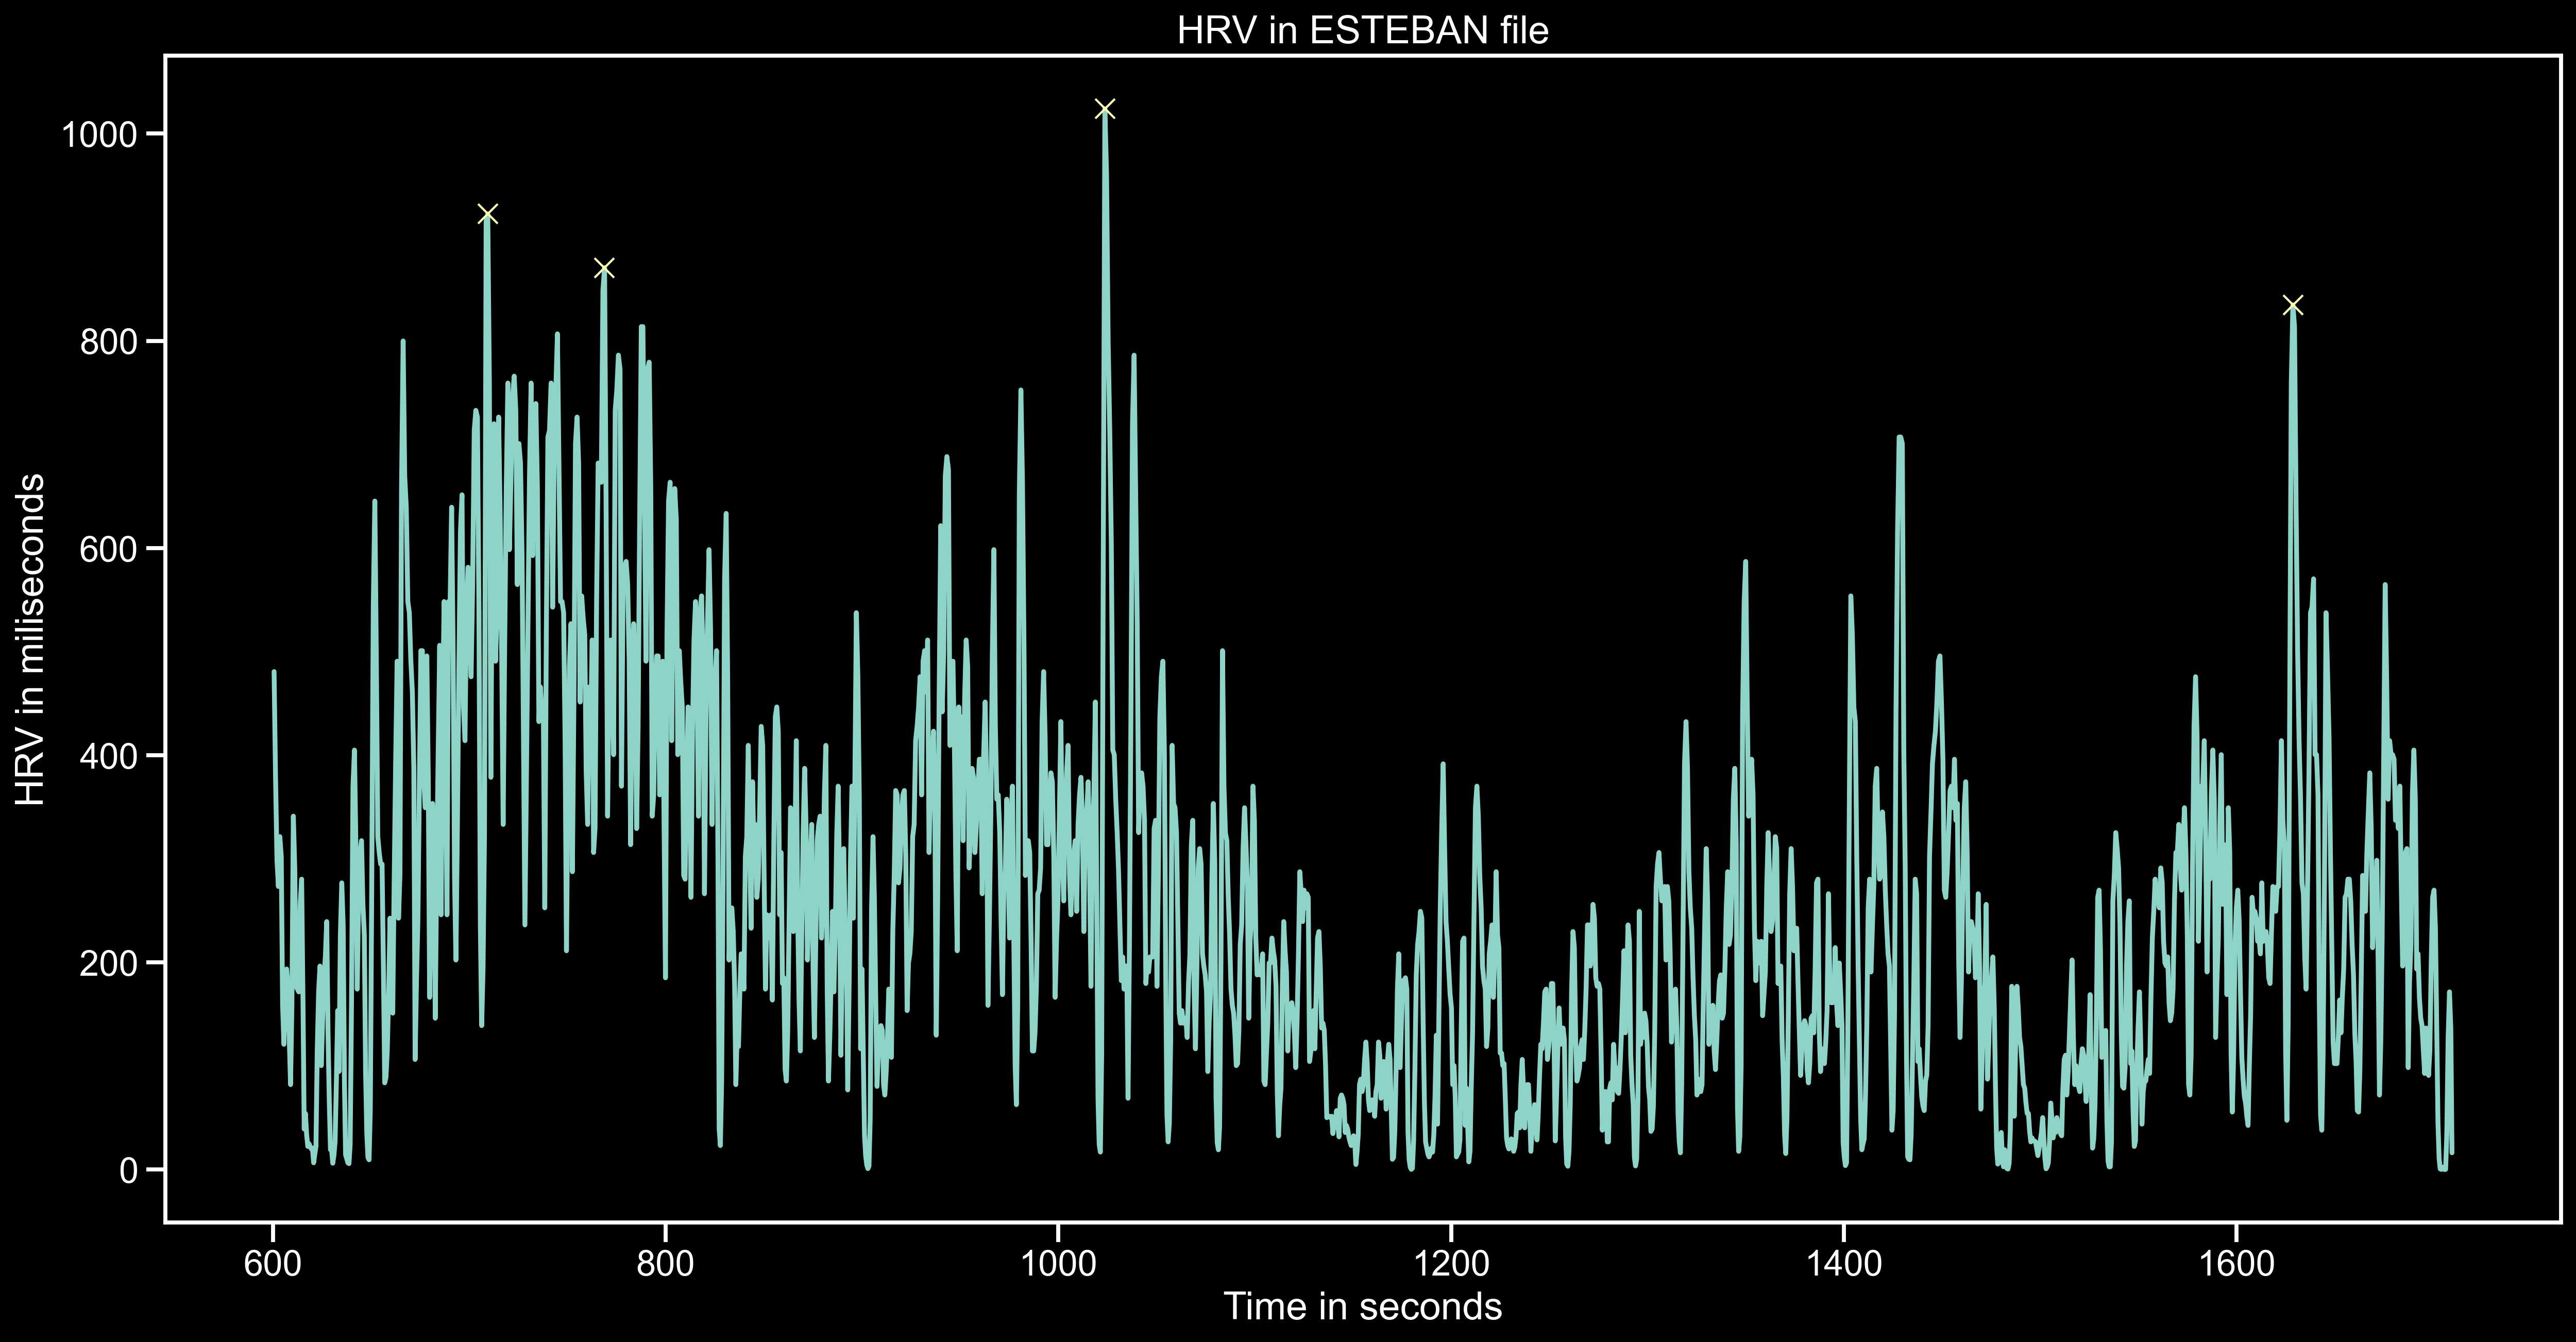

High variability in 11.823749999999999 minutes
High variability in 12.815216666666666 minutes
High variability in 17.061666666666667 minutes
High variability in 27.145316666666666 minutes


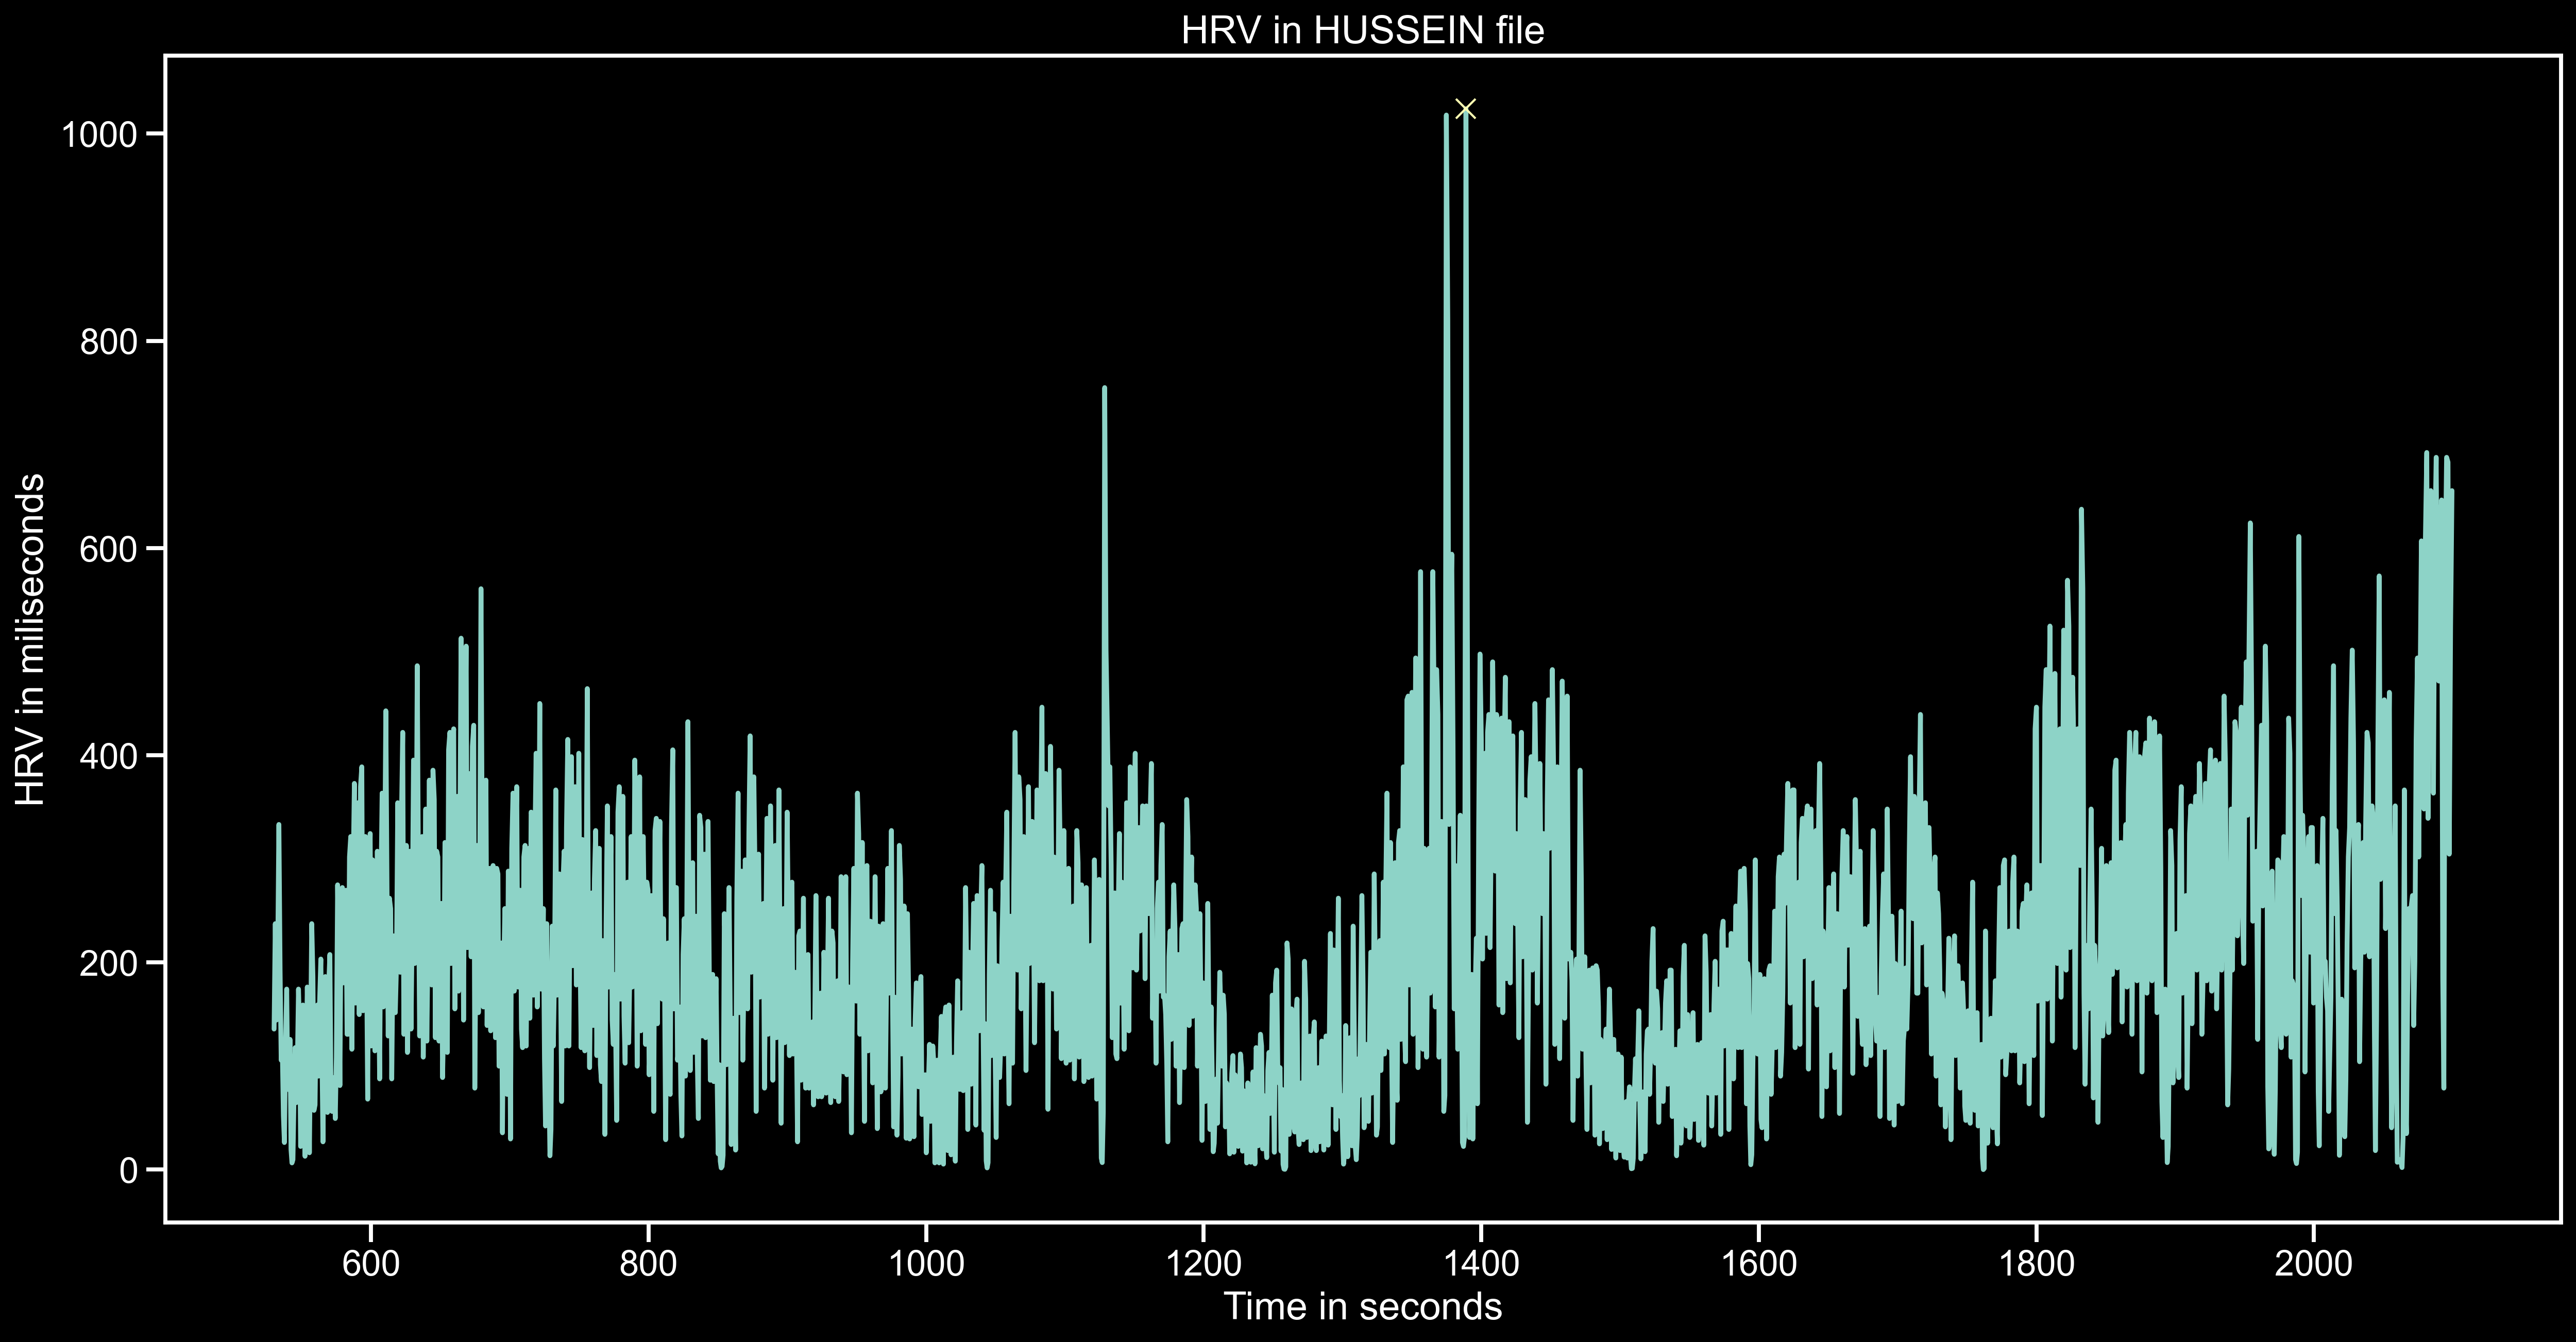

High variability in 23.149166666666666 minutes


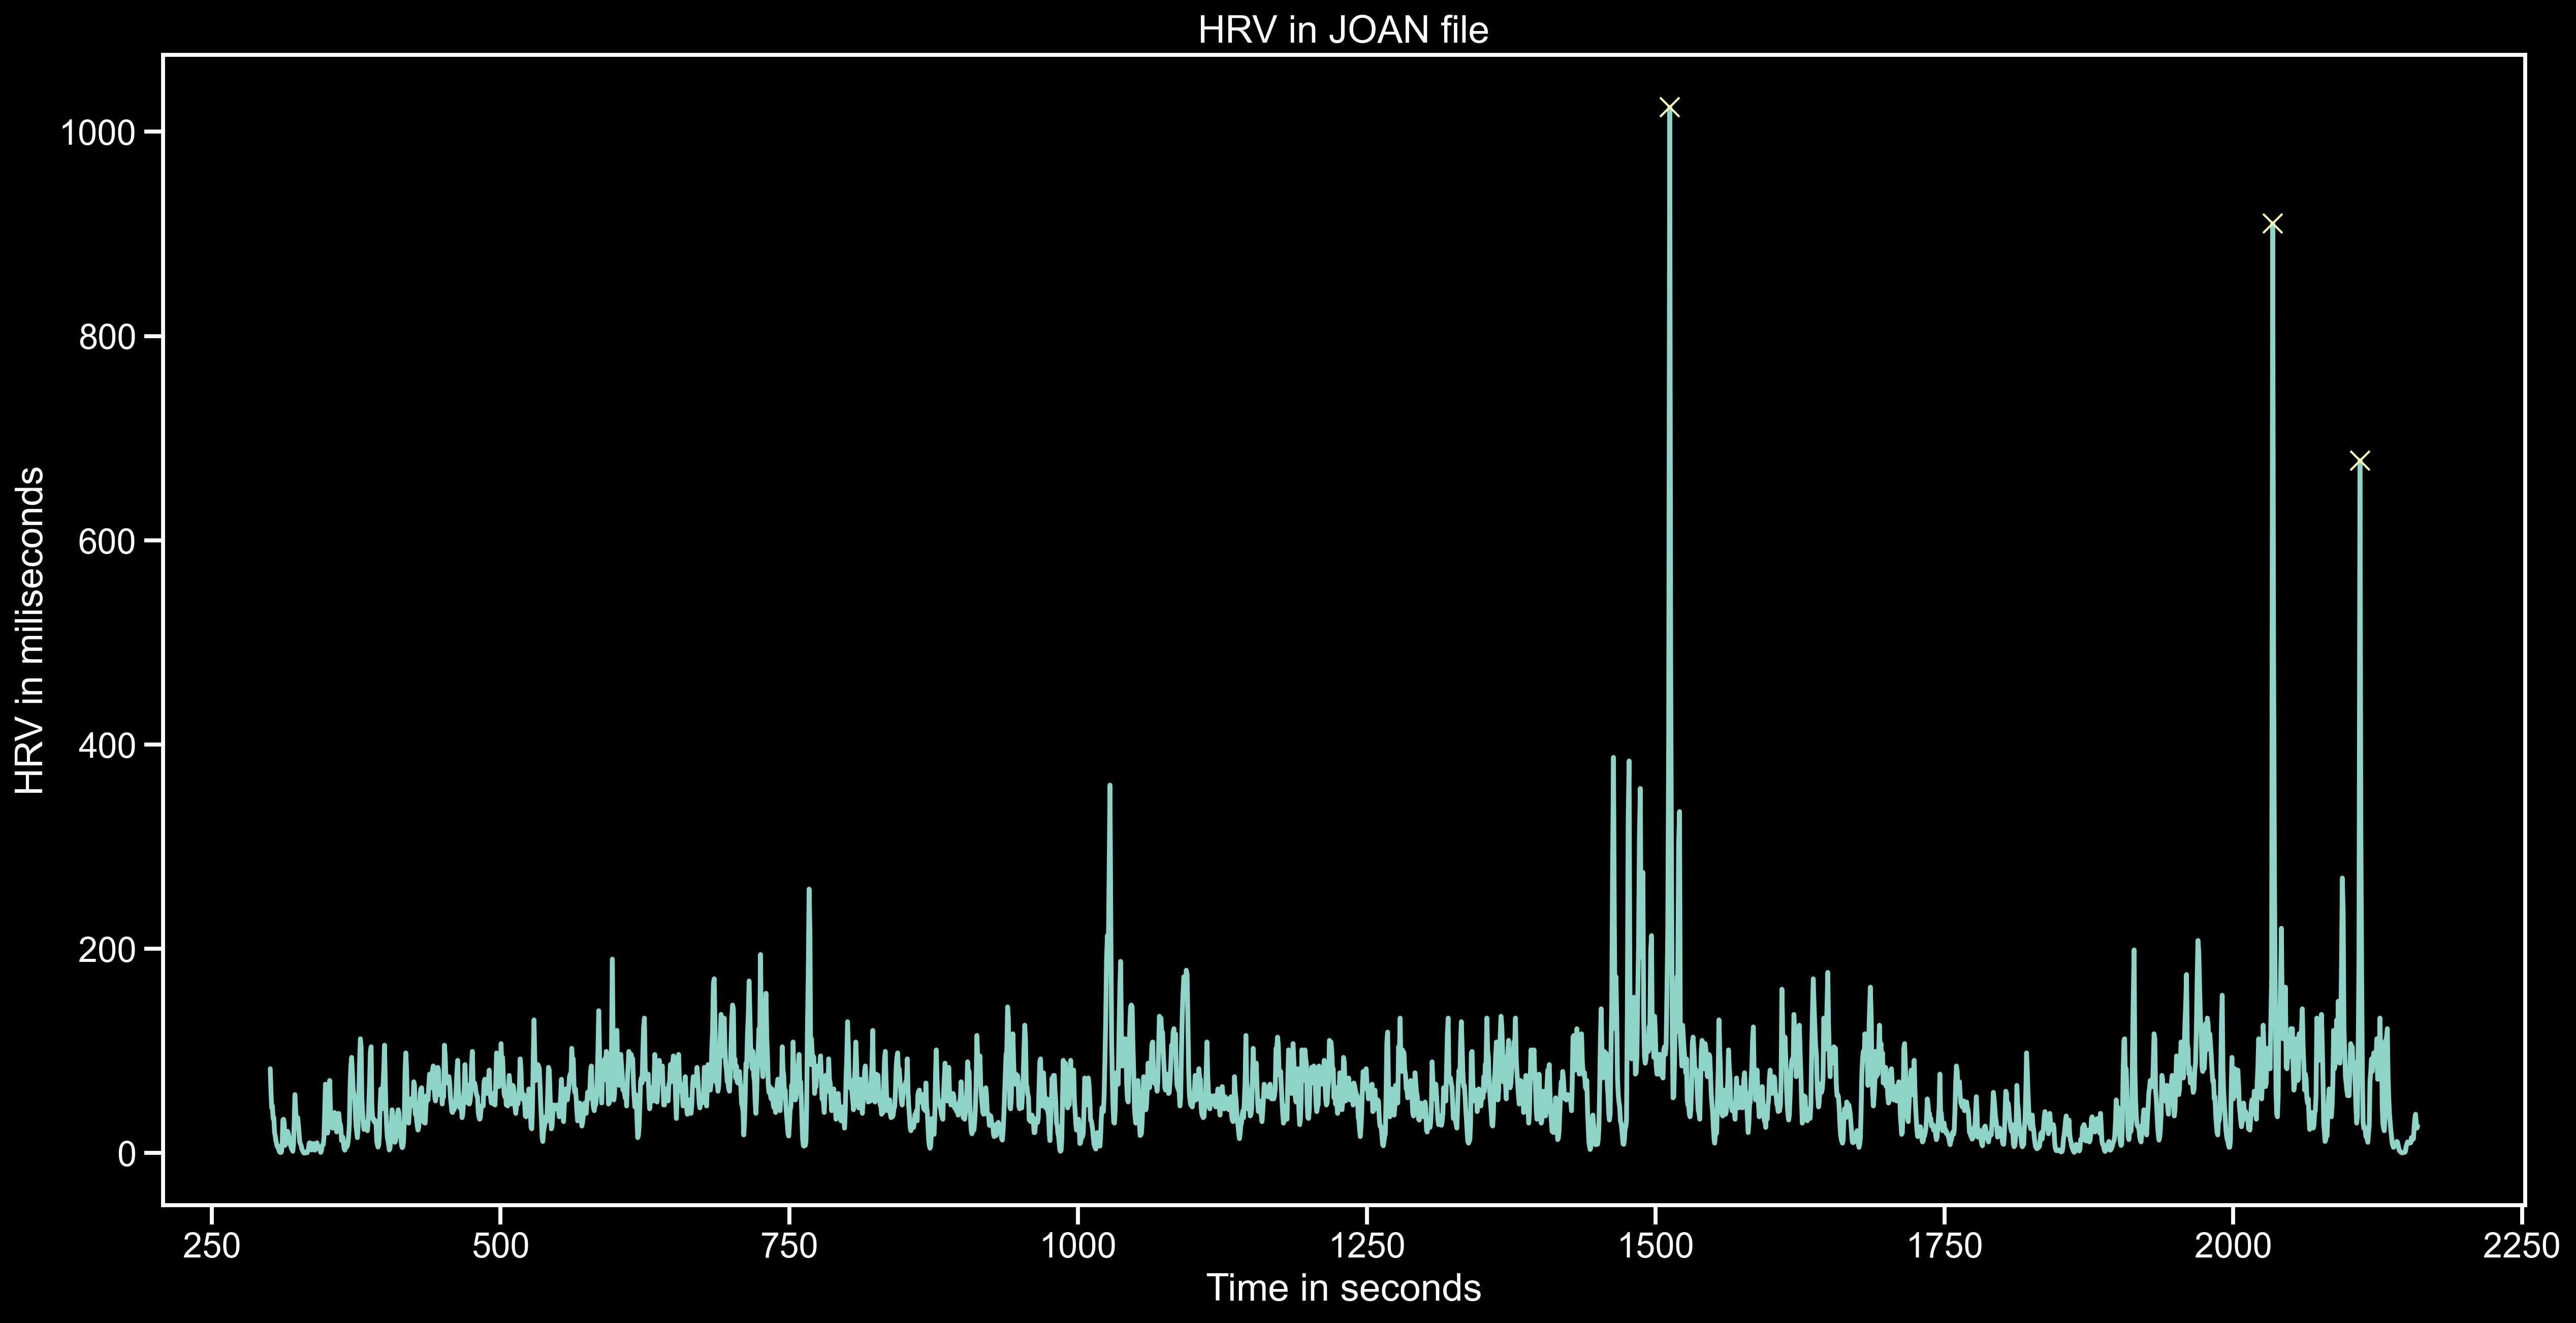

High variability in 25.2018 minutes
High variability in 33.900816666666664 minutes
High variability in 35.160133333333334 minutes


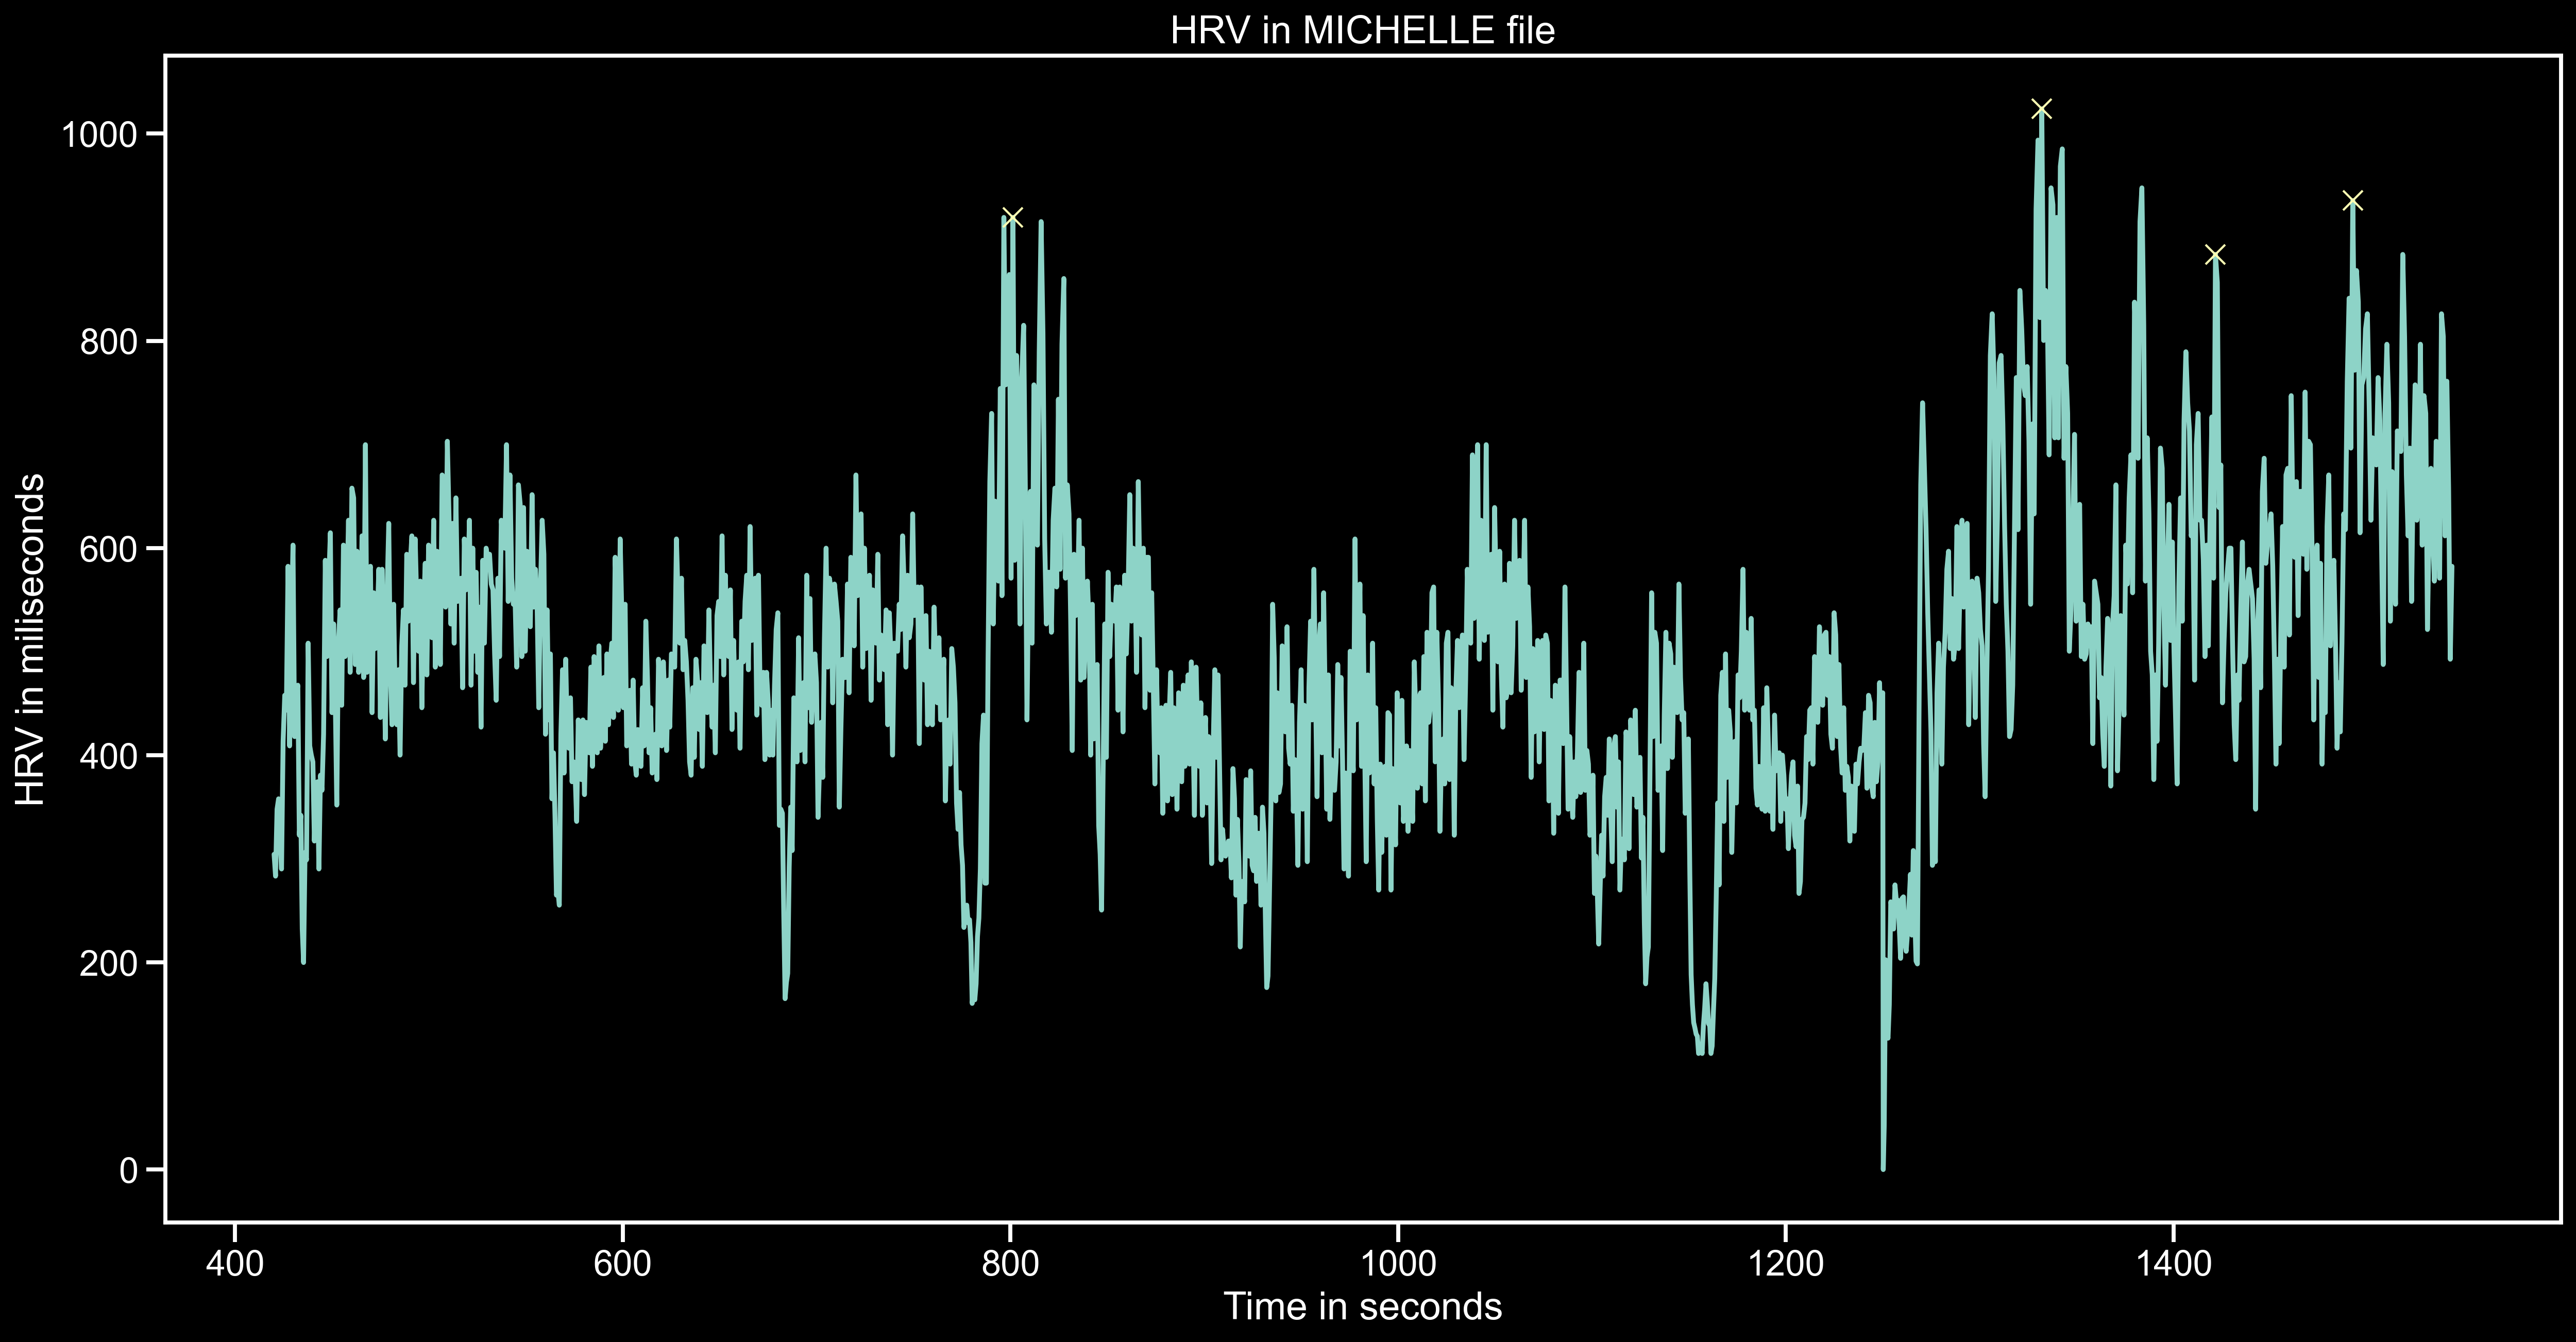

High variability in 13.35455 minutes
High variability in 22.200366666666664 minutes
High variability in 23.693483333333333 minutes
High variability in 24.8742 minutes


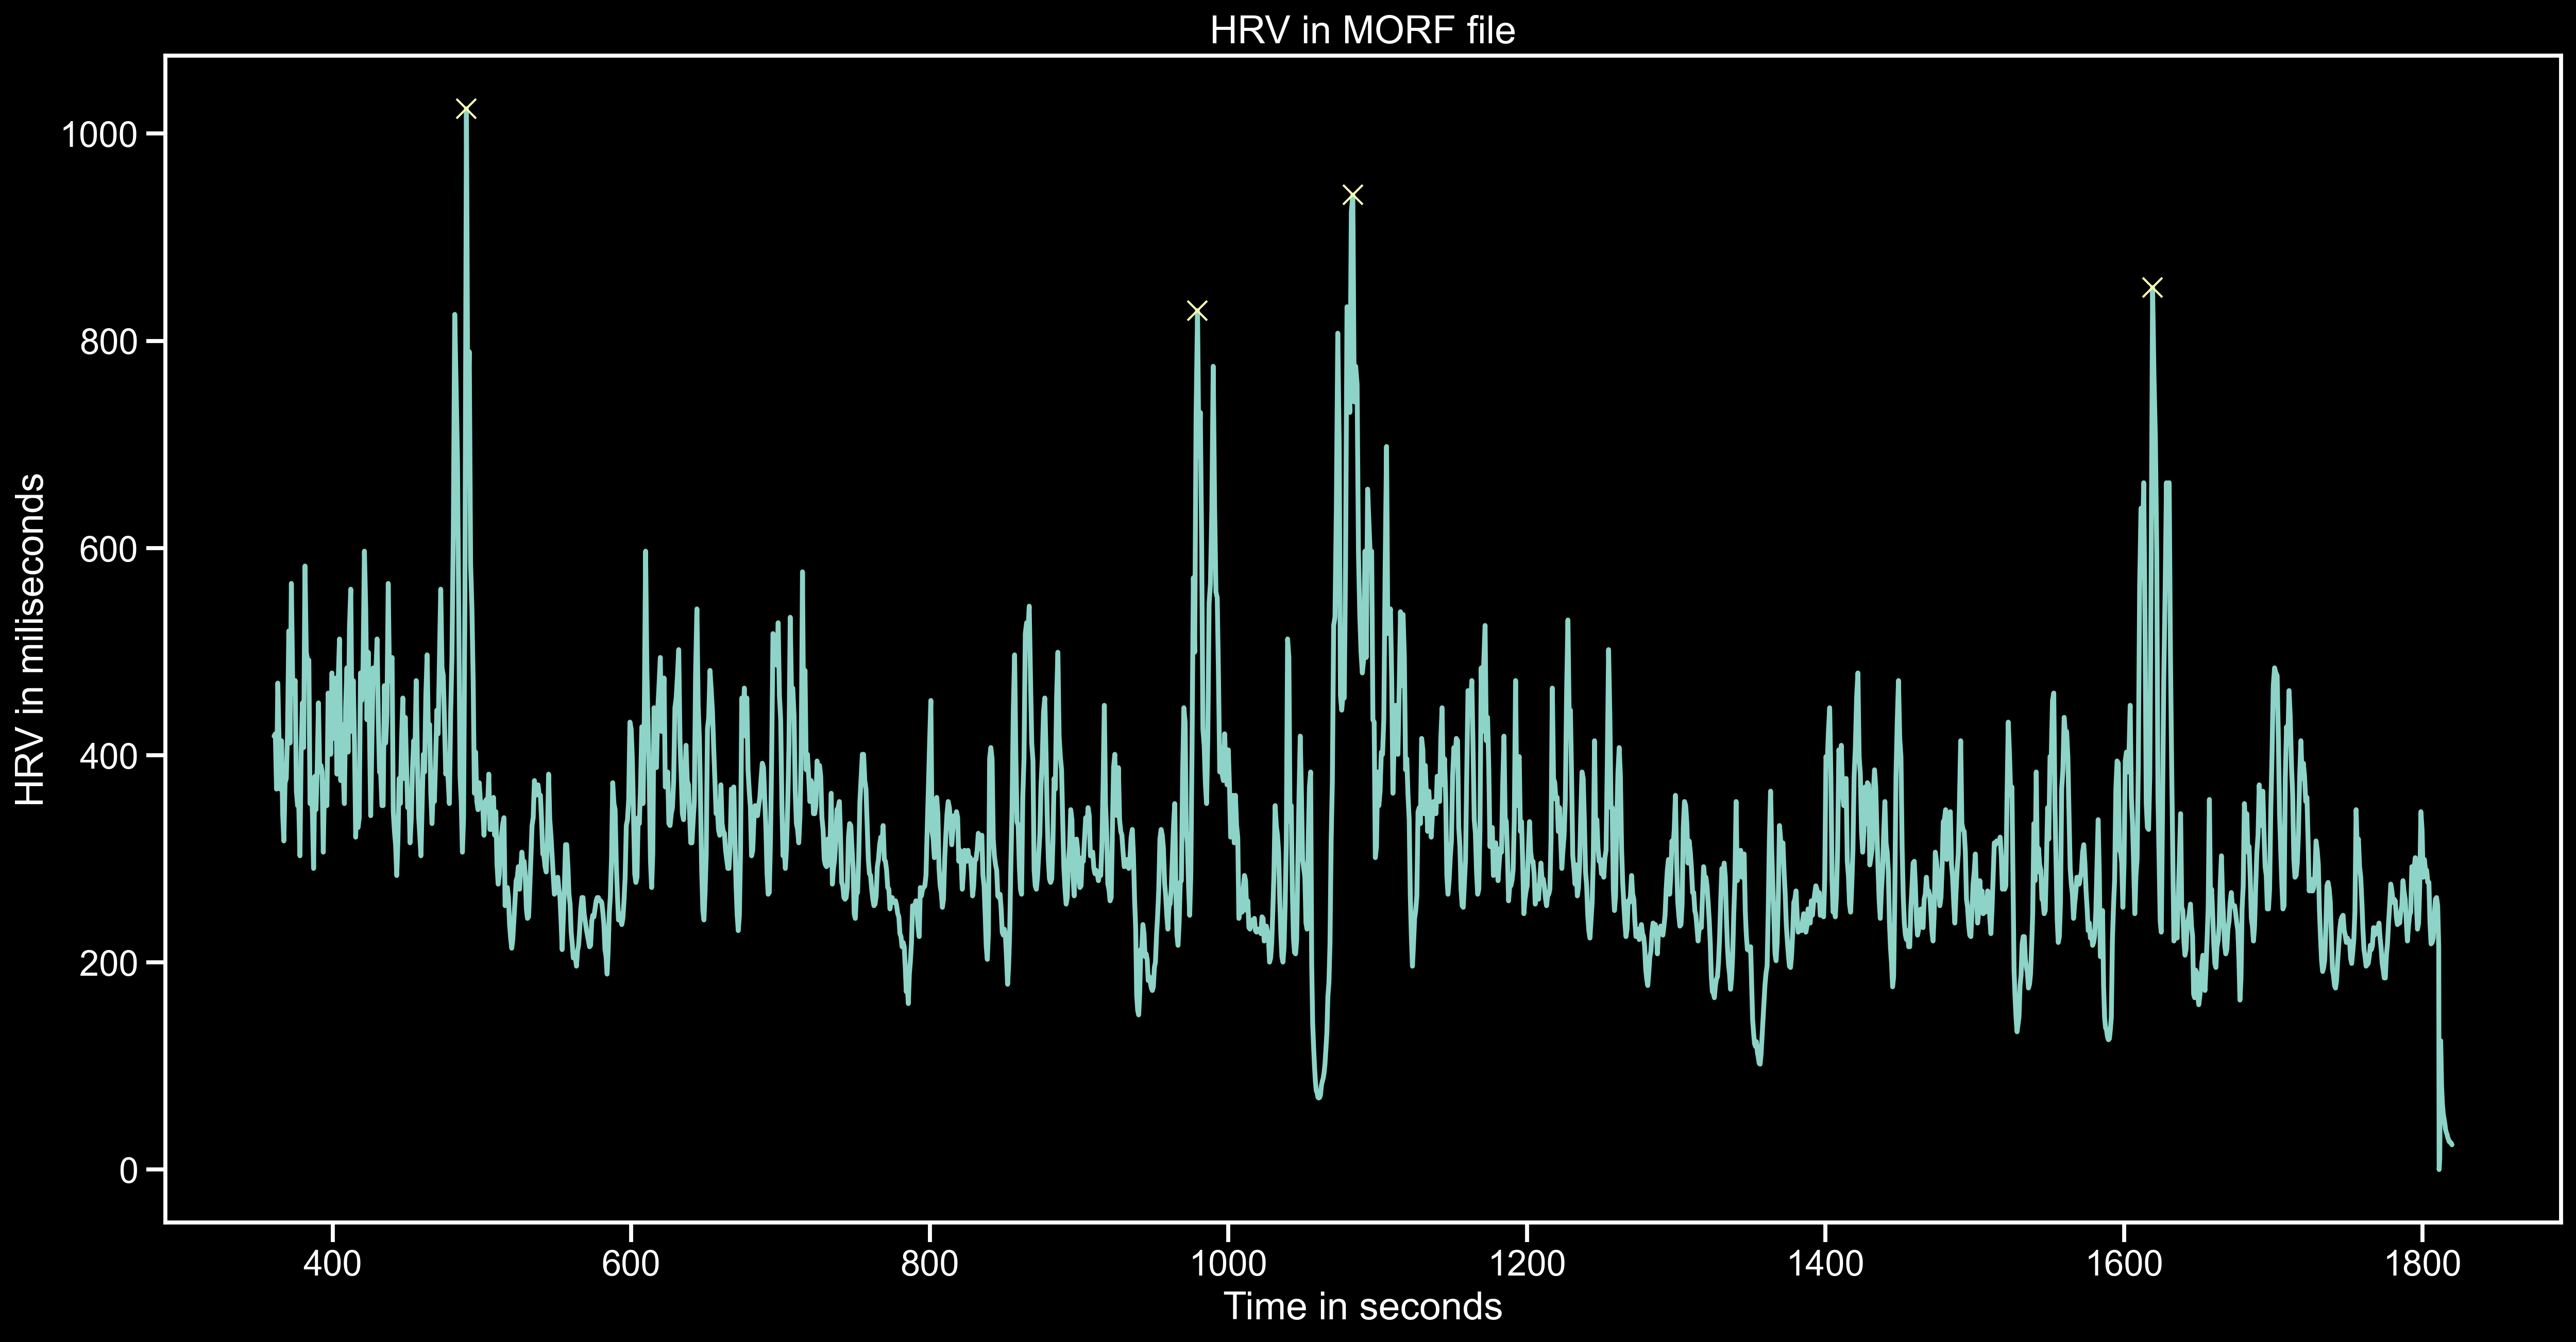

High variability in 8.16065 minutes
High variability in 16.32336666666667 minutes
High variability in 18.057433333333332 minutes
High variability in 26.98688333333333 minutes


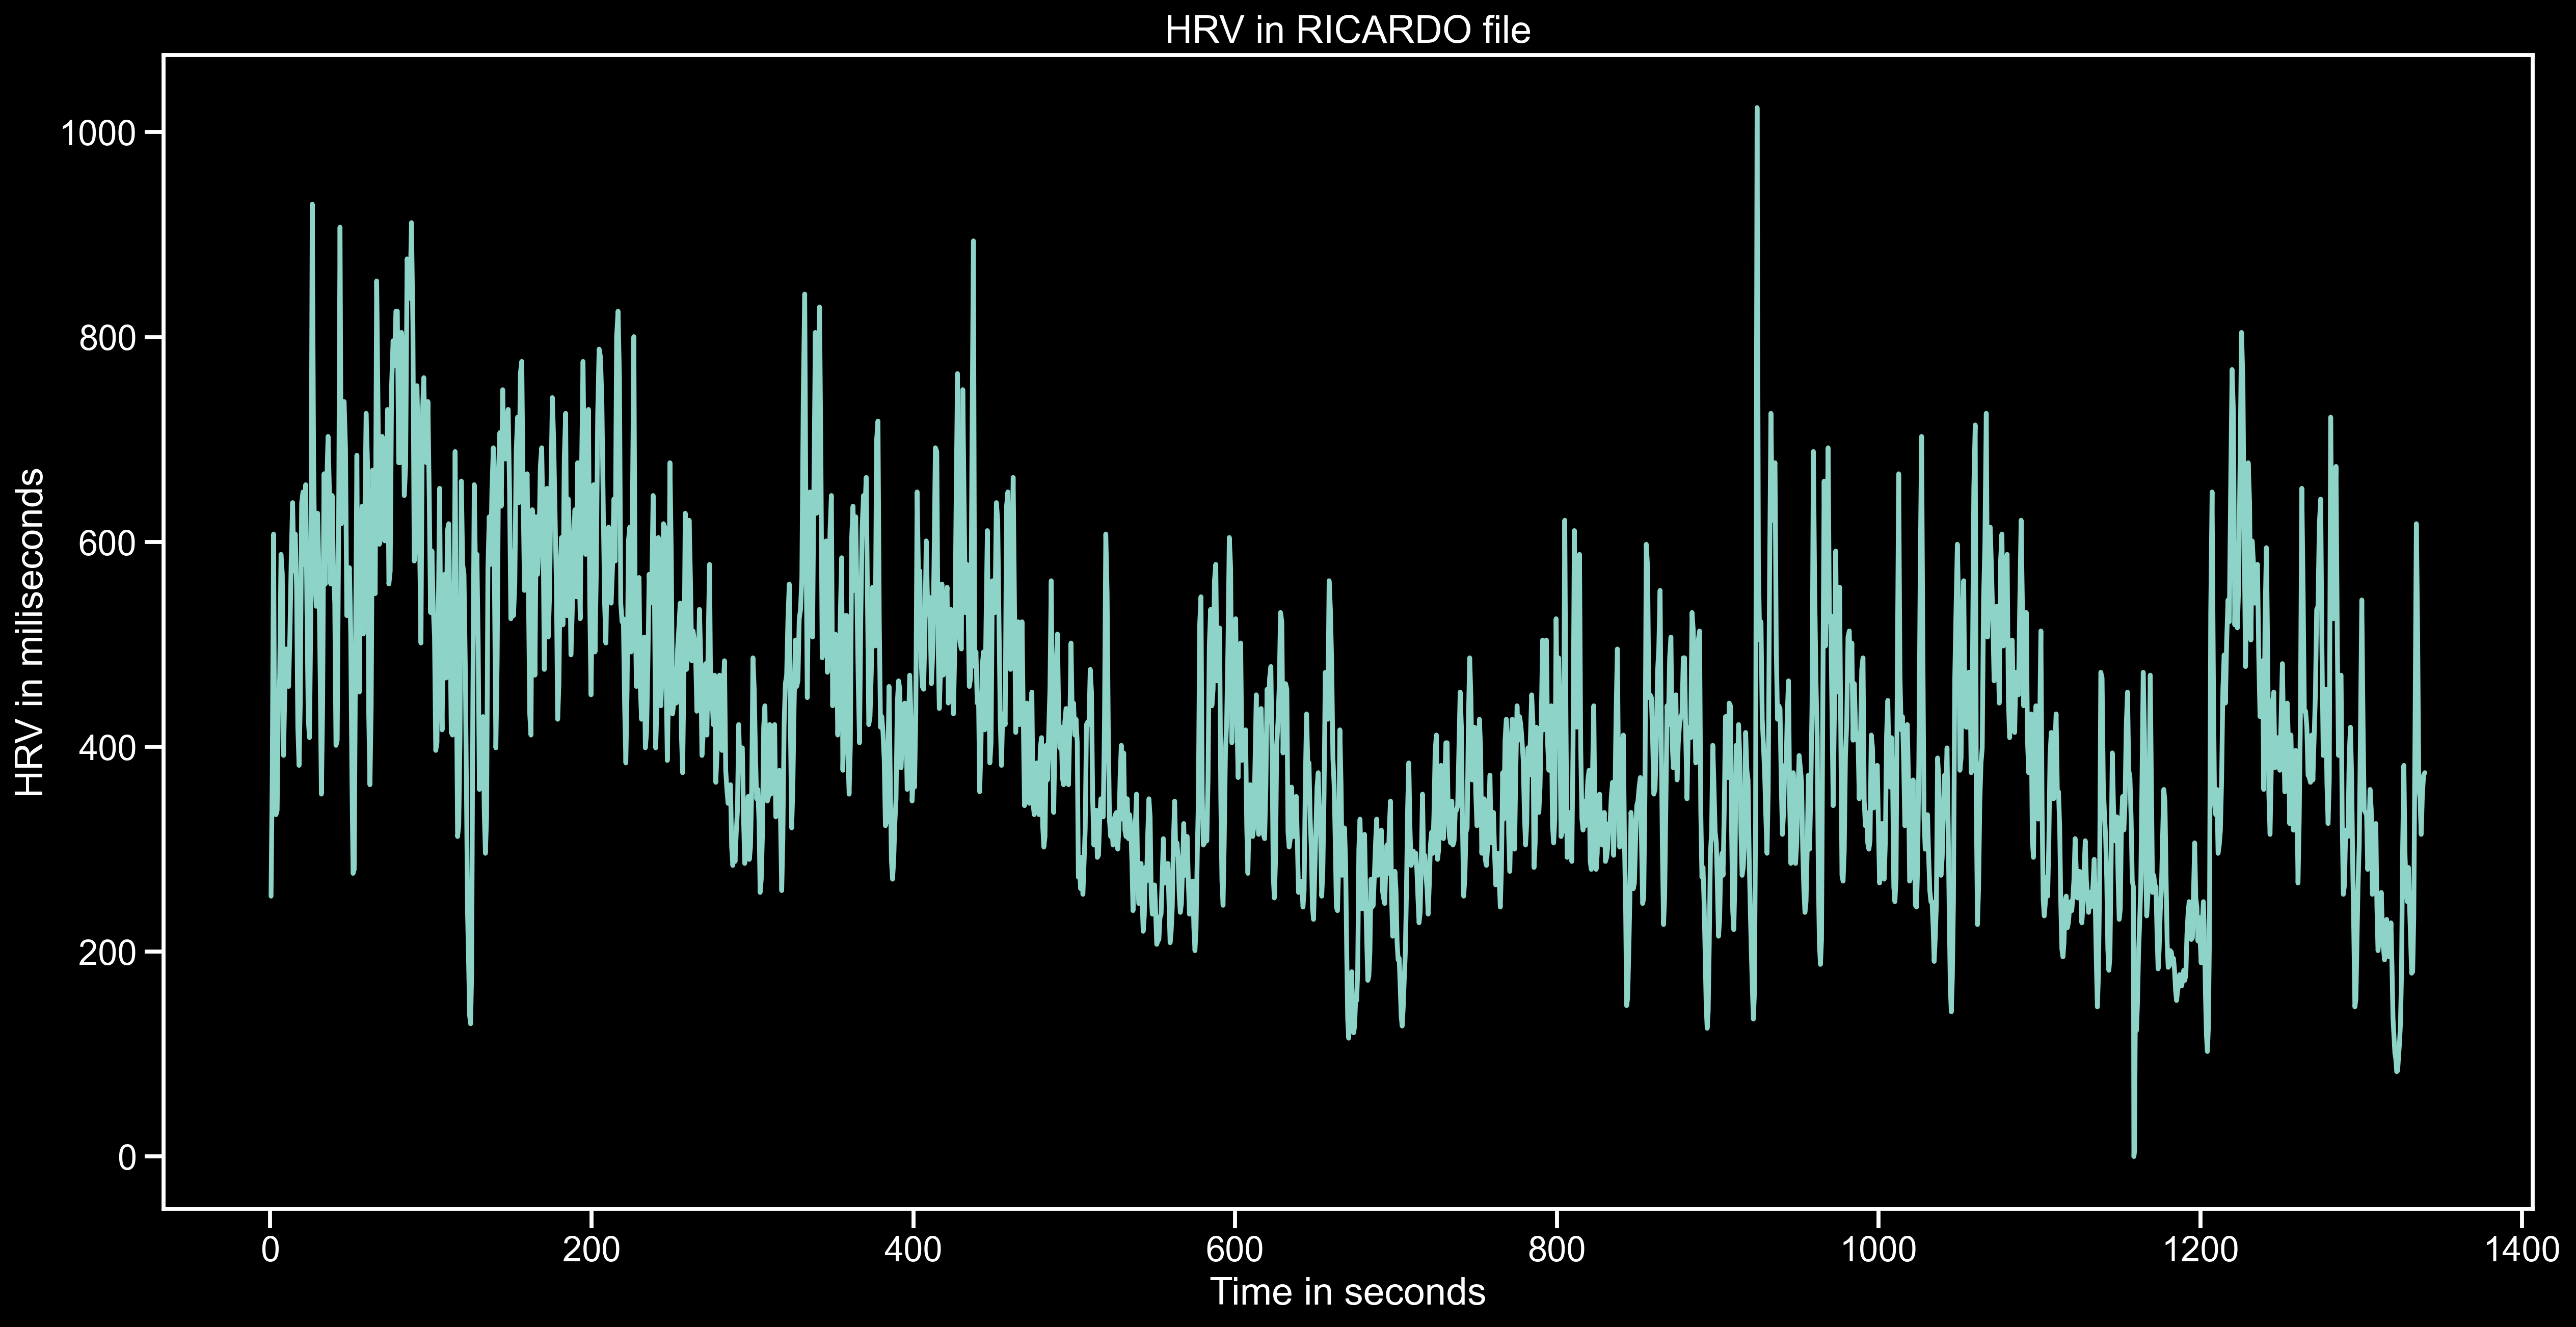

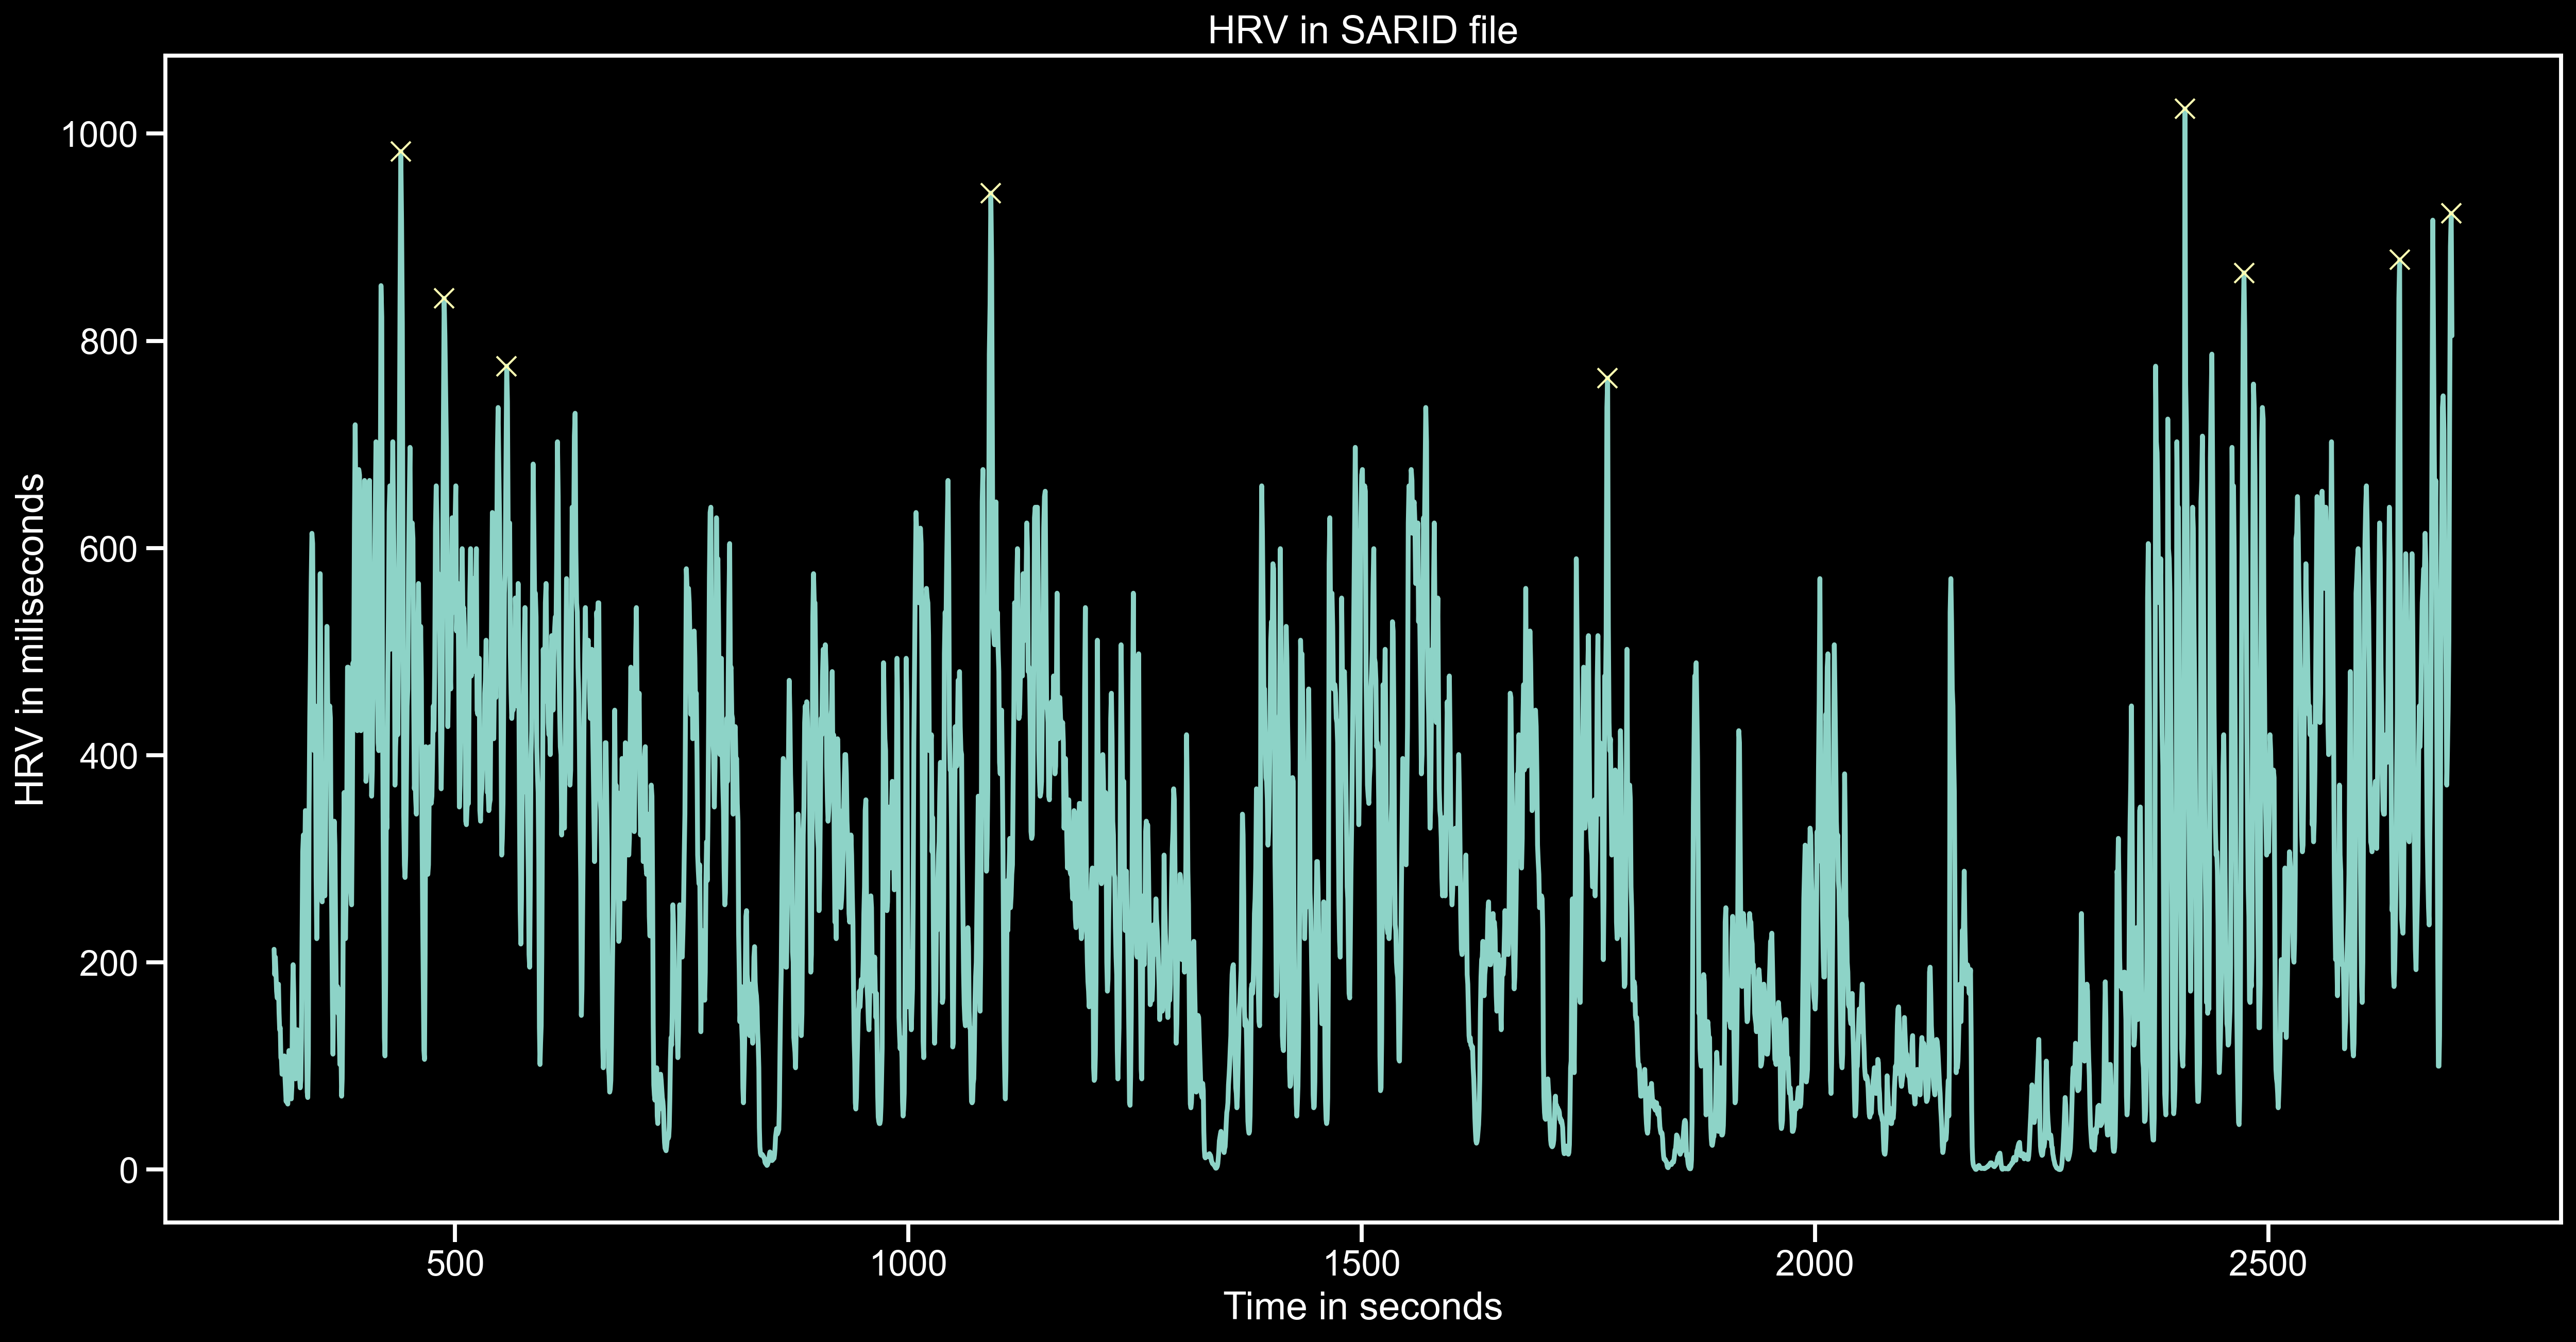

High variability in 7.3374500000000005 minutes
High variability in 8.1346 minutes
High variability in 9.284333333333333 minutes
High variability in 18.18395 minutes
High variability in 29.522083333333335 minutes
High variability in 40.13368333333334 minutes
High variability in 41.219 minutes
High variability in 44.08058333333334 minutes
High variability in 45.028533333333336 minutes


In [6]:
path = 'data/'
play = 'play/'
rest = 'rest/'

for f in os.listdir(path+play):
    rf = f.split('_')[:2]
    r = pd.read_csv(path+rest+rf[0]+'_'+rf[1]+'_resting.csv')
    p = pd.read_csv(path+play+f)
    
    enhanced = hp.enhance_peaks(p['HRV'], iterations=2)
    peaks, _ = find_peaks(enhanced, height=r['HRV'].mean(), distance=60)
    plt.plot(p['Time'], enhanced)
    plt.title('HRV in ' + rf[0] + ' file')
    plt.xlabel('Time in seconds')
    plt.ylabel('HRV in miliseconds')
    plt.plot(p['Time'][peaks], enhanced[peaks], "x")
    plt.show()
    #print(peaks)
    for pe in peaks:
        print('High variability in', p.iloc[pe]['Time']/60, 'minutes')